In [ ]:
import pandas as pd

data_path = "../data_sets/mimic-iii-data/"

df_patients = pd.read_csv(data_path + 'PATIENTS.csv.gz', low_memory=False)

df_diagnoses = pd.read_csv(data_path + 'DIAGNOSES_ICD.csv.gz', low_memory=False)

df_admissions = pd.read_csv(data_path + 'ADMISSIONS.csv.gz', low_memory=False)

# Merge diagnoses with admissions (to preserve hospitalization context)
dx_admit = pd.merge(
    df_diagnoses,
    df_admissions[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME']],
    on=['SUBJECT_ID', 'HADM_ID'],
    how='left'
)

# Then add patient demographics
final_df = pd.merge(
    dx_admit,
    df_patients[['SUBJECT_ID', 'GENDER', 'DOB', 'DOD']],
    on='SUBJECT_ID',
    how='left'
)

final_df.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ADMITTIME,DISCHTIME,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,1297,109,172335,1.0,40301,2141-09-18 10:32:00,2141-09-24 13:53:00,100,F,2117-08-07 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1
1,1298,109,172335,2.0,486,2141-09-18 10:32:00,2141-09-24 13:53:00,100,F,2117-08-07 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1
2,1299,109,172335,3.0,58281,2141-09-18 10:32:00,2141-09-24 13:53:00,100,F,2117-08-07 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1
3,1300,109,172335,4.0,5855,2141-09-18 10:32:00,2141-09-24 13:53:00,100,F,2117-08-07 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1
4,1301,109,172335,5.0,4254,2141-09-18 10:32:00,2141-09-24 13:53:00,100,F,2117-08-07 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,2142-08-30 00:00:00,1


<Axes: xlabel='age', ylabel='Count'>

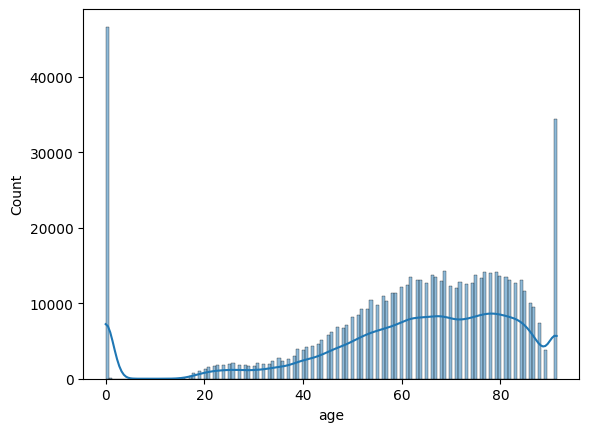

In [13]:
import seaborn as sns

final_df['ADMITTIME'] = pd.to_datetime(final_df['ADMITTIME'])
final_df['DOB'] = pd.to_datetime(final_df['DOB'])

# Calculate age (with MIMIC-III special handling for patients >89)
final_df['age_raw'] = (final_df['ADMITTIME'].dt.year - final_df['DOB'].dt.year)

# Replace ages >89 with 91.4 (MIMIC-III standard)
final_df['age'] = final_df['age_raw'].mask(final_df['age_raw'] > 89, 91.4)

sns.histplot(final_df['age'], kde=True)

<Axes: xlabel='age', ylabel='Count'>

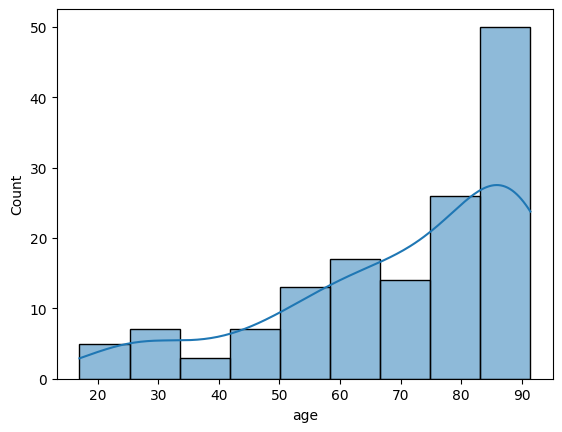

In [15]:
sah = final_df[final_df['ICD9_CODE'] == '85201']
# sah.head()
sns.histplot(sah['age'], kde=True)

(126, 16)

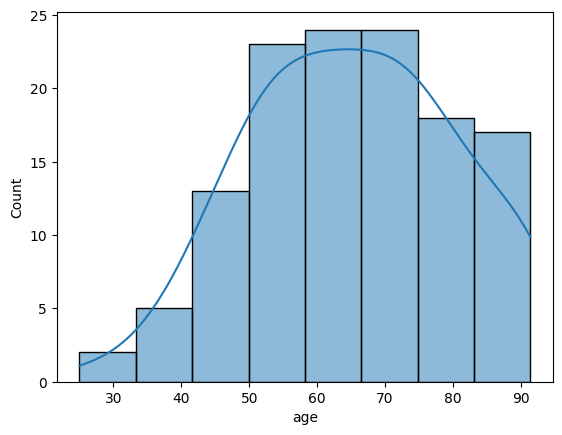

In [21]:
acute_bronchitis = final_df[final_df['ICD9_CODE'] == '4660']
# acute_bronchitis.head()
sns.histplot(acute_bronchitis['age'], kde=True)
acute_bronchitis.shape

|Factor|Subarachnoid Hemorrhage (85201)|	Acute Bronchitis (4660)
|---|---|---|
Clinical Severity|	High (emergency, often ICU)|	Low (typically outpatient)
Age Skew	|Left-skewed (older patients)|	More balanced
Sample| Size	142 patients	| 126 patients
LOS Variance|	Likely high (complex cases)	|Likely low (short stays)
Predictability|	Harder (many confounders)|	Easier (more homogeneous)